# 1. Data Exploration and Preprocessing:

In [37]:
import pandas as pd
import numpy as np


In [38]:
dt=pd.read_csv('adult_with_headers.csv')
dt

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [39]:
dt.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [40]:
numerical_features = dt.select_dtypes(include=['int64', 'float64']).columns

In [41]:
from sklearn.preprocessing import MinMaxScaler,LabelEncoder, StandardScaler

In [42]:
min_max_scaler = MinMaxScaler()
dt_min_max_scaled = dt.copy()
dt_min_max_scaled[numerical_features] = min_max_scaler.fit_transform(dt[numerical_features])
dt_min_max_scaled[numerical_features] 

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.301370,0.044302,0.800000,0.021740,0.0,0.397959
1,0.452055,0.048238,0.800000,0.000000,0.0,0.122449
2,0.287671,0.138113,0.533333,0.000000,0.0,0.397959
3,0.493151,0.151068,0.400000,0.000000,0.0,0.397959
4,0.150685,0.221488,0.800000,0.000000,0.0,0.397959
...,...,...,...,...,...,...
32556,0.136986,0.166404,0.733333,0.000000,0.0,0.377551
32557,0.315068,0.096500,0.533333,0.000000,0.0,0.397959
32558,0.561644,0.094827,0.533333,0.000000,0.0,0.397959
32559,0.068493,0.128499,0.533333,0.000000,0.0,0.193878


In [43]:
standard_scaler = StandardScaler()
dt_standard_scaled = dt.copy()
dt_standard_scaled[numerical_features] = standard_scaler.fit_transform(dt[numerical_features])


# Discuss the scenarios where each scaling technique is preferred and why.
=>Standard Scaling is preferred when the algorithm assumes the data follows a normal distribution or is sensitive to the variance and scale of features.
Min-Max Scaling is preferred when the features need to be within a specific range or when dealing with algorithms sensitive to the magnitude of features, such as neural networks and k-means clustering.

# New features

In [44]:
def age_group(age):
    if age < 30:
        return 'Young'
    elif 30 <= age < 60:
        return 'Middle-aged'
    else:
        return 'Senior'

dt['age_group'] = dt['age'].apply(age_group)

# Create Work Hours per Week Category feature
def work_hours_category(hours):
    if hours < 20:
        return 'Part-time'
    elif 20 <= hours <= 40:
        return 'Full-time'
    else:
        return 'Over-time'

dt['work_hours_category'] = dt['hours_per_week'].apply(work_hours_category)


dt

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,age_group,work_hours_category
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,Middle-aged,Full-time
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,Middle-aged,Part-time
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,Middle-aged,Full-time
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,Middle-aged,Full-time
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,Young,Full-time
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,Young,Full-time
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,Middle-aged,Full-time
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,Middle-aged,Full-time
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,Young,Full-time


In [45]:
categorical_cols = dt.select_dtypes(include=['object']).columns
categorical_cols_unique_counts = {col: dt[col].nunique() for col in categorical_cols}


In [46]:
one_hot_cols = [col for col, unique_count in categorical_cols_unique_counts.items() if unique_count < 5]
dt = pd.get_dummies(dt, columns=one_hot_cols)
dt

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,...,sex_ Female,sex_ Male,income_ <=50K,income_ >50K,age_group_Middle-aged,age_group_Senior,age_group_Young,work_hours_category_Full-time,work_hours_category_Over-time,work_hours_category_Part-time
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,2174,...,0,1,1,0,1,0,0,1,0,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,0,...,0,1,1,0,1,0,0,0,0,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,0,...,0,1,1,0,1,0,0,1,0,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,...,0,1,1,0,1,0,0,1,0,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,...,1,0,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,0,...,1,0,1,0,0,0,1,1,0,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,0,...,0,1,0,1,1,0,0,1,0,0
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,0,...,1,0,1,0,1,0,0,1,0,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,0,...,0,1,1,0,0,0,1,1,0,0


In [47]:
label_cols = [col for col, unique_count in categorical_cols_unique_counts.items() if unique_count >= 5]
label_encoder = LabelEncoder()
for col in label_cols:
    dt[col] = label_encoder.fit_transform(dt[col])
dt

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,...,sex_ Female,sex_ Male,income_ <=50K,income_ >50K,age_group_Middle-aged,age_group_Senior,age_group_Young,work_hours_category_Full-time,work_hours_category_Over-time,work_hours_category_Part-time
0,39,7,77516,9,13,4,1,1,4,2174,...,0,1,1,0,1,0,0,1,0,0
1,50,6,83311,9,13,2,4,0,4,0,...,0,1,1,0,1,0,0,0,0,1
2,38,4,215646,11,9,0,6,1,4,0,...,0,1,1,0,1,0,0,1,0,0
3,53,4,234721,1,7,2,6,0,2,0,...,0,1,1,0,1,0,0,1,0,0
4,28,4,338409,9,13,2,10,5,2,0,...,1,0,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,2,13,5,4,0,...,1,0,1,0,0,0,1,1,0,0
32557,40,4,154374,11,9,2,7,0,4,0,...,0,1,0,1,1,0,0,1,0,0
32558,58,4,151910,11,9,6,1,4,4,0,...,1,0,1,0,1,0,0,1,0,0
32559,22,4,201490,11,9,4,1,3,4,0,...,0,1,1,0,0,0,1,1,0,0


# Discuss the pros and cons of One-Hot Encoding and Label Encoding.
=>One-Hot Encoding
pros-
 One-hot encoding does not assume any ordinal relationship between the categories, making it suitable for nominal (non-ordinal) categorical data.
It ensures that no information about the categorical values is lost during the transformation. Works well with algorithms that assume a distance metric

Cons-
For datasets with a high number of unique categories, one-hot encoding can significantly increase the dimensionality of the data, leading to higher memory usage and computational cost. It generates a sparse matrix (many zeros), which can be inefficient to process, especially for algorithms that do not handle sparsity well. With large datasets and high cardinality features, the resulting matrix can become unmanageable.

Label Encoding
pros-
 It transforms the data into a simple, compact numerical format.Reduces the dimensionality of the data compared to one-hot encoding, which can be beneficial for algorithms sensitive to high-dimensional spaces. Requires less memory and computational resources compared to one-hot encoding.
 
 cons-
 Imposes an ordinal relationship between the categories, which may not be appropriate for nominal data. Algorithms may interpret these numerical values as having a natural order, leading to incorrect results. Some algorithms might assign an unintended importance to the encoded values based on their magnitude, introducing bias. Not suitable for algorithms that rely on distance metrics since the numeric encoding can distort the true distance between categorical values.

In [48]:
skewed_features = dt[numerical_features].apply(lambda x: x.skew()).sort_values(ascending=False)
print(skewed_features)

capital_gain      11.953848
capital_loss       4.594629
fnlwgt             1.446980
age                0.558743
hours_per_week     0.227643
education_num     -0.311676
dtype: float64


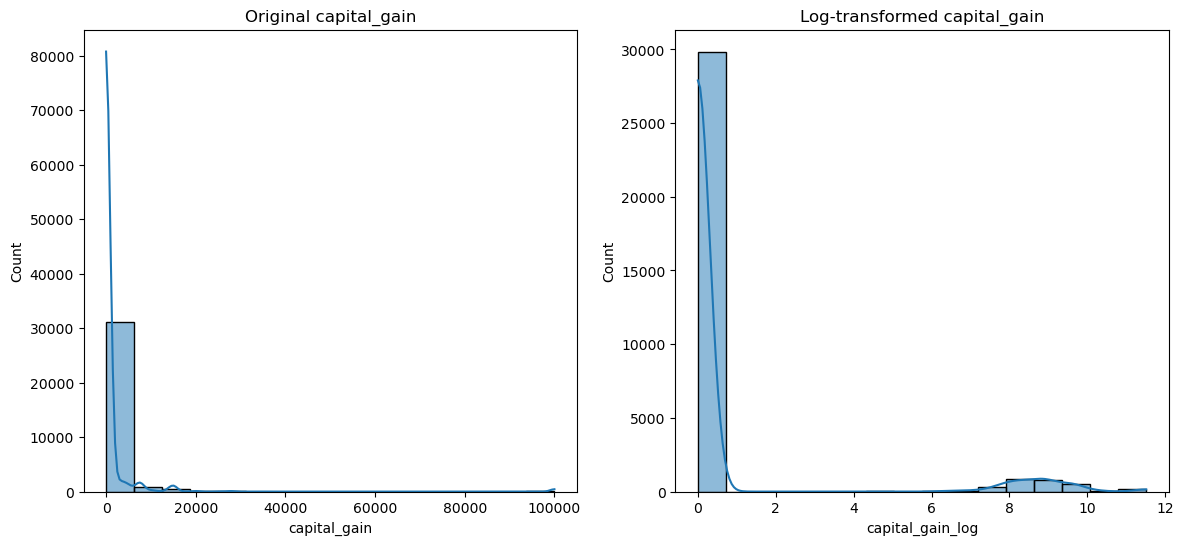

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
dt['capital_gain_log'] = np.log1p(dt['capital_gain'])


fig, ax = plt.subplots(1, 2, figsize=(14, 6))
sns.histplot(dt['capital_gain'], ax=ax[0], kde=True)
ax[0].set_title('Original capital_gain')

sns.histplot(dt['capital_gain_log'], ax=ax[1], kde=True)
ax[1].set_title('Log-transformed capital_gain')

plt.show()

As capital_gain has high skeweness so I applied log transformation to this column to reduce the skeweness.

In [50]:
from sklearn.ensemble import IsolationForest

In [51]:
clf = IsolationForest(random_state=10)
clf.fit(dt)

IsolationForest(random_state=10)

In [52]:
y_pred_outliers = clf.predict(dt)

In [53]:
import statistics as st
import numpy as np
y_pred_outliers 

array([ 1, -1,  1, ...,  1,  1, -1])

In [54]:
st.Counter(y_pred_outliers == -1)

Counter({False: 24853, True: 7708})

In [55]:
clf.decision_function(dt)

array([ 0.02251538, -0.00790418,  0.10305784, ...,  0.06751555,
        0.07925907, -0.06912387])

In [56]:
dt['scores']=clf.decision_function(dt)
dt

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,...,income_ <=50K,income_ >50K,age_group_Middle-aged,age_group_Senior,age_group_Young,work_hours_category_Full-time,work_hours_category_Over-time,work_hours_category_Part-time,capital_gain_log,scores
0,39,7,77516,9,13,4,1,1,4,2174,...,1,0,1,0,0,1,0,0,7.684784,0.022515
1,50,6,83311,9,13,2,4,0,4,0,...,1,0,1,0,0,0,0,1,0.000000,-0.007904
2,38,4,215646,11,9,0,6,1,4,0,...,1,0,1,0,0,1,0,0,0.000000,0.103058
3,53,4,234721,1,7,2,6,0,2,0,...,1,0,1,0,0,1,0,0,0.000000,0.052215
4,28,4,338409,9,13,2,10,5,2,0,...,1,0,0,0,1,1,0,0,0.000000,-0.037164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,2,13,5,4,0,...,1,0,0,0,1,1,0,0,0.000000,0.025044
32557,40,4,154374,11,9,2,7,0,4,0,...,0,1,1,0,0,1,0,0,0.000000,0.100694
32558,58,4,151910,11,9,6,1,4,4,0,...,1,0,1,0,0,1,0,0,0.000000,0.067516
32559,22,4,201490,11,9,4,1,3,4,0,...,1,0,0,0,1,1,0,0,0.000000,0.079259


In [57]:
dt['anomaly_scores']=clf.fit_predict(dt)
dt

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,...,income_ >50K,age_group_Middle-aged,age_group_Senior,age_group_Young,work_hours_category_Full-time,work_hours_category_Over-time,work_hours_category_Part-time,capital_gain_log,scores,anomaly_scores
0,39,7,77516,9,13,4,1,1,4,2174,...,0,1,0,0,1,0,0,7.684784,0.022515,1
1,50,6,83311,9,13,2,4,0,4,0,...,0,1,0,0,0,0,1,0.000000,-0.007904,-1
2,38,4,215646,11,9,0,6,1,4,0,...,0,1,0,0,1,0,0,0.000000,0.103058,1
3,53,4,234721,1,7,2,6,0,2,0,...,0,1,0,0,1,0,0,0.000000,0.052215,1
4,28,4,338409,9,13,2,10,5,2,0,...,0,0,0,1,1,0,0,0.000000,-0.037164,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,2,13,5,4,0,...,0,0,0,1,1,0,0,0.000000,0.025044,1
32557,40,4,154374,11,9,2,7,0,4,0,...,1,1,0,0,1,0,0,0.000000,0.100694,1
32558,58,4,151910,11,9,6,1,4,4,0,...,0,1,0,0,1,0,0,0.000000,0.067516,1
32559,22,4,201490,11,9,4,1,3,4,0,...,0,0,0,1,1,0,0,0.000000,0.079259,1


In [58]:
outliers = dt[dt['anomaly_scores'] == -1]
inliers = dt[dt['anomaly_scores'] == 1]


In [59]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
dt_pca = pca.fit_transform(dt)


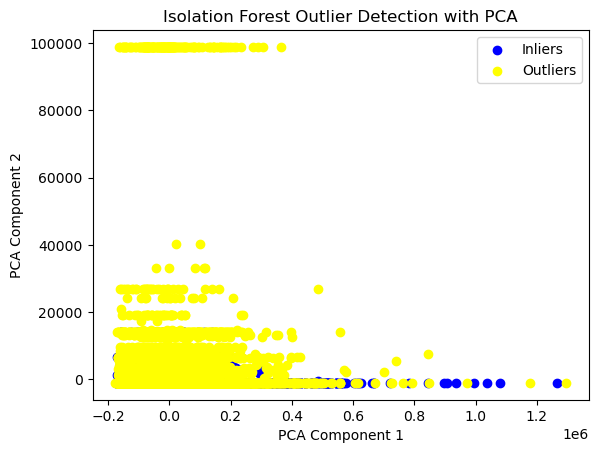

In [60]:
plt.scatter(dt_pca [inliers.index, 0], dt_pca [inliers.index, 1], color='blue', label='Inliers')
plt.scatter(dt_pca [outliers.index, 0],dt_pca [outliers.index, 1], color='yellow', label='Outliers')
plt.legend()
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Isolation Forest Outlier Detection with PCA')
plt.show()

In [61]:
cleaned_dt = dt[dt['anomaly_scores'] == 1].drop(columns=['anomaly_scores'])

# Discuss how outliers can affect model performance.
=> Impact of Outliers on Model Performance
1. Distorted Parameter Estimates
2. Reduced Model Accuracy
3. Overfitting
4. Algorithm Robustness

In [63]:
!pip install ppscore==1.3.0

In [70]:
import ppscore as pps


In [71]:
features = dt.columns[:20]
dt=dt[features]

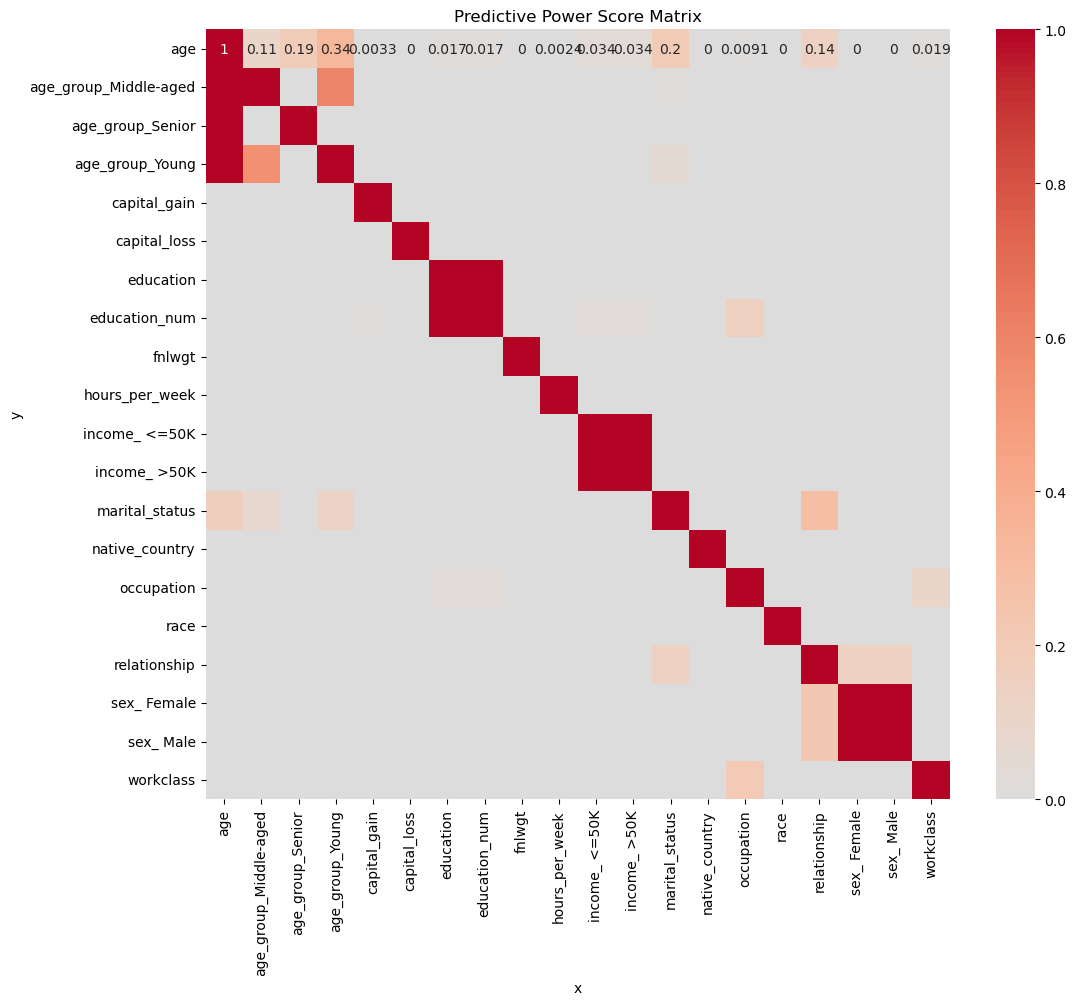

In [73]:
pps_matrix = pps.matrix(dt)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
plt.figure(figsize=(12, 10))
sns.heatmap(pps_matrix, annot=True, cmap="coolwarm", center=0)
plt.title('Predictive Power Score Matrix')
plt.show()

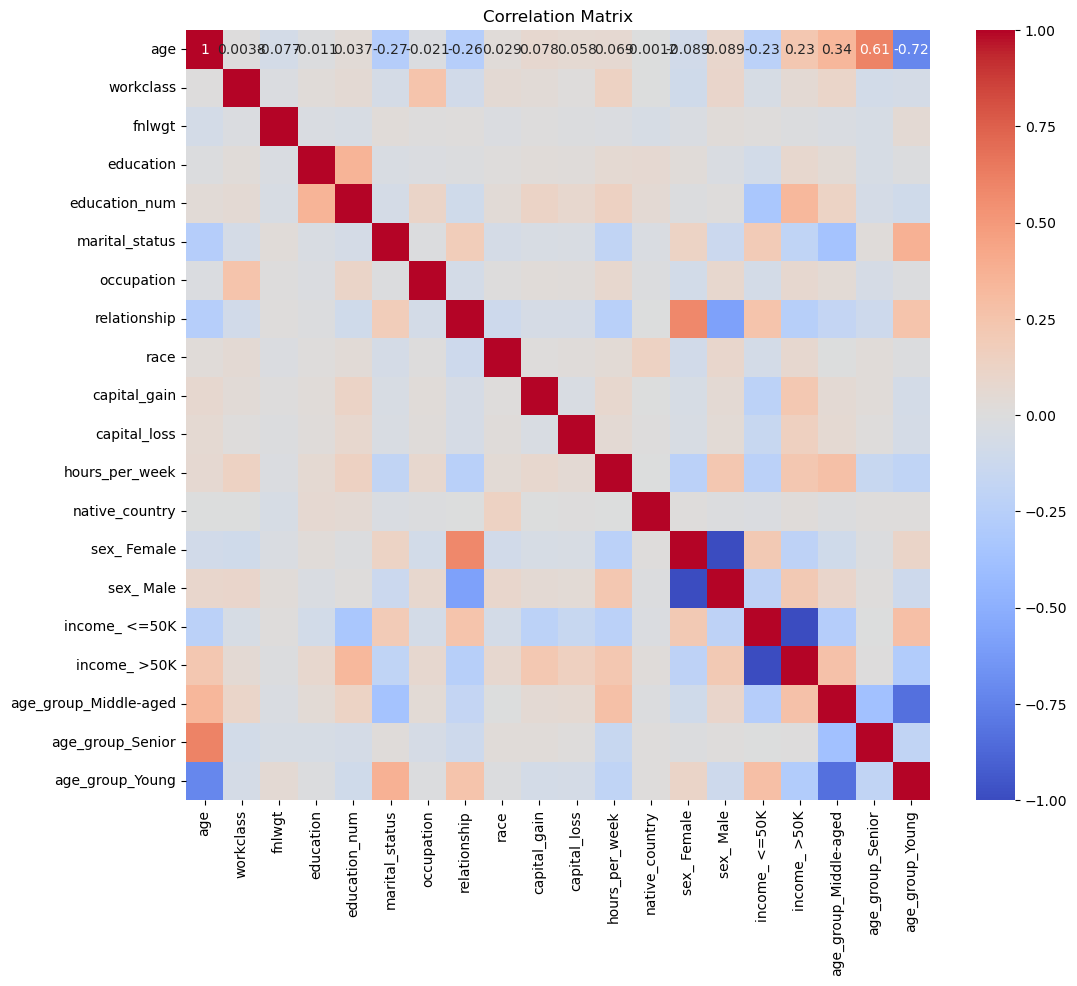

In [75]:
correlation_matrix = dt.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)
plt.title('Correlation Matrix')
plt.show()

In [77]:
top_pps_scores = pps_matrix.unstack().sort_values(ascending=False).head(10)
top_correlations = correlation_matrix.unstack().sort_values(ascending=False).drop_duplicates().head(10)

print("Top PPS Scores:")
print(top_pps_scores)

print("\n\nTop Correlations:")
print(top_correlations)

Top PPS Scores:
x               y             
age             age               1.0
income_ <=50K   income_ >50K      1.0
capital_gain    capital_gain      1.0
capital_loss    capital_loss      1.0
education       education         1.0
                education_num     1.0
education_num   education         1.0
                education_num     1.0
fnlwgt          fnlwgt            1.0
hours_per_week  hours_per_week    1.0
dtype: float64


Top Correlations:
age                    age                      1.000000
age_group_Senior       age                      0.606023
sex_ Female            relationship             0.582454
marital_status         age_group_Young          0.370531
education_num          education                0.359153
age                    age_group_Middle-aged    0.337969
income_ >50K           education_num            0.335154
age_group_Young        income_ <=50K            0.286926
age_group_Middle-aged  hours_per_week           0.277847
                       in